<a href="https://colab.research.google.com/github/Esaipriya/AISECT-ML/blob/main/Weather_Prediction_cls_rpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import a pandas library
import pandas as pd

In [2]:
#read a file using pandas
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [3]:
#to know the information about the dataset columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
# print the dataset
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
# take a value counts to know the weather  categorical variables
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [42]:
import pandas as pd



dataset = pd.DataFrame(dataset)

# Function to group similar categories
def categorize_weather(w):
    w_lower = w.lower()
    if "clear" in w_lower:
        return "Clear"
    elif "cloudy" in w_lower or "cloud" in w_lower:
        return "Cloudy"
    elif "snow" in w_lower:
        return "Snow"
    elif "drizzle" in w_lower:
        return "Drizzle"
    elif "rain" in w_lower:   # this will catch Rain, Freezing Rain, Rain Showers, etc.
        return "Rain"
    elif "fog" in w_lower or "haze" in w_lower:
        return "cloudy"
    elif "thunderstorm" in w_lower:
        return "Thunderstorms"
    else:
        return "Other"

# Apply the function
dataset["Weather"] = dataset["Weather"].apply(categorize_weather)

# Group and sum counts
result = dataset.groupby("Weather", as_index=False)["Weather"].sum()


In [44]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,cloudy
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,cloudy
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,Drizzle
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,Drizzle
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,cloudy
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [51]:
# value counts after grouping
dataset["Weather"].value_counts()

,count
Weather,
Cloudy,3797
Clear,3432
Rain,662
Snow,583
cloudy,170
Drizzle,138
Thunderstorms,2


In [46]:
# know  the columns
dataset.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [27]:
#Assign the independent variables
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [28]:
#Assign the dependent variables
dep=dataset[["Weather"]]

In [29]:
# do the method train ,test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [30]:
#importing tree  based algorithm
from sklearn import tree

In [31]:
# import decision tree classification algorithm
clf = tree.DecisionTreeClassifier()

In [32]:
# train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# used for prediction  by X_test
y_pred=clf.predict(X_test)

In [34]:
#import classification report
from sklearn.metrics import classification_report

In [35]:
#classification report
cls=classification_report(y_test, y_pred)

In [43]:
# print  classification report
print(cls)

              precision    recall  f1-score   support

       Clear       0.63      0.66      0.64       665
      Cloudy       0.63      0.64      0.64       772
     Drizzle       0.27      0.30      0.28        27
         Fog       0.62      0.62      0.62        37
        Rain       0.45      0.42      0.43       127
        Snow       0.80      0.63      0.70       129

    accuracy                           0.62      1757
   macro avg       0.57      0.54      0.55      1757
weighted avg       0.63      0.62      0.62      1757



In [47]:
# Merge "Drizzle" into "Rain"
y_train = y_train.replace({"Drizzle": "Rain"})
y_test = y_test.replace({"Drizzle": "Rain"})

# retrain model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Clear       0.64      0.67      0.65       665
      Cloudy       0.64      0.64      0.64       772
         Fog       0.66      0.62      0.64        37
        Rain       0.52      0.49      0.51       154
        Snow       0.72      0.65      0.69       129

    accuracy                           0.64      1757
   macro avg       0.64      0.61      0.63      1757
weighted avg       0.64      0.64      0.64      1757



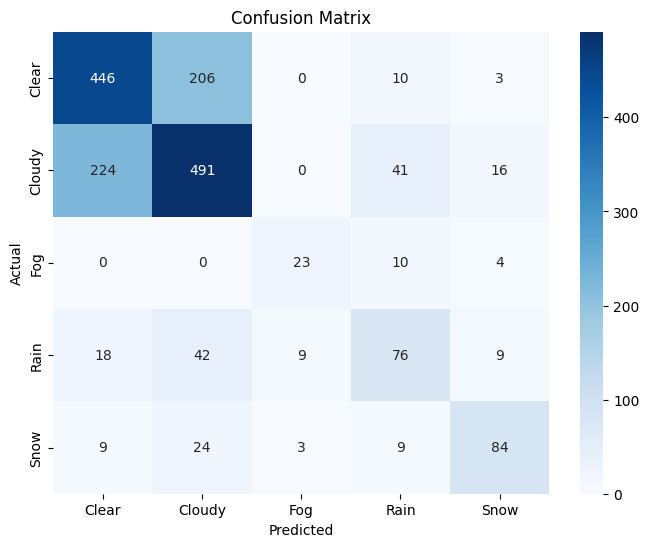

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class labels
labels = ["Clear", "Cloudy", "Fog", "Rain", "Snow"]

# Predict
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# 🔹 Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [58]:
from sklearn.metrics import confusion_matrix

# Define class labels
labels = ["Clear", "Cloudy", "Fog", "Rain", "Snow"]

# Predict
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

In [59]:
cm

array([[446, 206,   0,  10,   3],
       [224, 491,   0,  41,  16],
       [  0,   0,  23,  10,   4],
       [ 18,  42,   9,  76,   9],
       [  9,  24,   3,   9,  84]])

In [ ]:
"""Precision = How many of your positive predictions are correct.
Recall = How many of the actual positives you caught
 in the above confusion matrix plot the TP values are :446,491,23,76,84
 FP values are: 224,0,18,9.   FN values are :206,0,10,3"""
